# Début d'implémentation du modèle

### Étape 0 : Importations

In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn.functional as F

import math
import pandas as pd

from random import *
import random
from random import randrange
from random import sample 

from numpy.random import multinomial

### Étape 0 bis : Corpus test

In [2]:
liste_couples = {
    0:("homme","femme"),
    1:("chien","chat"),
    2:("vanille","chocolat"),
    3:("poli","courtois"),
    4:("choqué","horrifié"),
    5:("propre","sale"),
    6:("canapé","fauteuil"),
    7:("téléphone","portable"),
    8:("voiture","camion"),
    9:("grand","petit")
}

couples_contexte = {
("homme","femme") : ["sexe","genre","mari","épouse","famille","inégalités","enfant","amour","couple","différence"],                  
("chien","chat") : ["animal","domestique","maison","aboyer","miauler","labrador","poil","pattes","spa","ami"],
("vanille","chocolat") : ["parfum","goût","fraise","glace","boule","gâteau","bonbon","blanc","noir","préférence"],
("poli","courtois") : ["bonjour","merci","pardon","stp","règles","apprendre","savoir-vivre","savoir-être","formule","demander"],
("choqué","horrifié") : ["peur","terreur","phobie","clown","noir","araignée","rat","cri","oh","ah"],
("propre","sale") : ["nettoyer","vaisselle","laver","savon","produit","salissures","traces","net","éclatant","brillant"],
("canapé","fauteuil") : ["maison","salon","assis","confortable","sofa","convertible","cuir","télé","accoudoir","plaid"],
("téléphone","portable") : ["appel","allo","décrocher","sms","numéro","mobile","orange","sfr","free","bouygues"],
("voiture","camion") : ["moto","véhicule","conduire","rouler","conducteur","volant","chauffeur","permis","vitesse","passager"],
("grand","petit") : ["taille","géant","nain","s","m","l","xl","mesure","énorme"]
}

bruits = ['ALLATES','NEBULES','LONGTON','PAWESIN','SORENGO','SEXTEES','TAXIONS','ELEWIJT','EPEISME','APOTOME',
'REMORVA','HOBOKEN','MALICES','SOMZEEN','NEDDOIS','RECLIVA','GILEREZ','GAULDOS','GOINFRA','RAYERES','BOTTEES','VAGITES','PRELEES','GARDERA','ANATASE','DATASSE',
'BILLAGE','POUCAVE','REFUGES','REDIMAI','SOLANGE','EMBOISE','BACHAGA','FAMINER','ECUMONS','HARWELL','VEURDES','AZURERA','ENUQUAI','MAULAIS','MEVENIR','GAUDENT',
'MENTANA','REHERSE','ARBECEY','FAUXAMI','BALADOU','REVERDI','BEDAVES','BORAMES','PONTIFE','ALESIEZ','REFIXER','IRRUIEZ','DRESSEZ','PYROIDE','GNAQUAI','LAVETON',
'RERESTA','EPRISSE','FROLERA','RAVEURS','CITRINE','NAUNHOF','FEUTRIE','RETASEE','TIMBREE','GANTERA','HALENES','SUSIENS','DEGOUTE','BINAGES','VEAUTES','LAISSAI',
'STERANE','RECERNE','RELIQUE','FLAGGER','DELAVAS','SUADERA','PINIERS','DOMPTER','CARRARE','ROSAZIA','LIMITAS','EUCLIDE','FARCANT','BLATERE','STRICTS','REFLOTS',
'PAGELLE','BLAUZAC','BROCHER','TOPDOWN','UNIFERE','EHOUPER','ASININS','ASSAKIS','HOTELES','DENIOTE']

i = 0
for mot in bruits:
    mot_min = mot.lower()
    bruits[i] = mot_min
    i += 1
    
corpus_f = []
for i in range(10000):
    indiceCouple = randrange(0,10)
    membreCouple = randrange(0,2)
    # On a notre mot clé
    mot_cle = liste_couples[indiceCouple][membreCouple]
    # On récupère les contextes, on va en tirer 5
    liste_mot = couples_contexte[liste_couples[indiceCouple]]
    ech_contexte = sample(liste_mot,5)
    # On génère le bruit 
    ech_bruit = sample(bruits,3)
    # On crée la phrase
    phrase = []
    phrase.append(mot_cle)
    for mot in ech_contexte:
        phrase.append(mot)
    for bruit in ech_bruit:
        phrase.append(bruit)
    random.shuffle(phrase)
    corpus_f.append(phrase)

### Étape 1 : Récupération des données

In [20]:
df = pd.read_csv("C:/Users/torna/Documents/StatApp/StatApp/data/sample1.txt",sep='\n',header=None)

### Étape 2 : Créer le vocabulaire à partir du corpus de phrases

In [15]:
df2 = df[0:1000]

corpus = []
for index, row in df2.iterrows():
    for j, column in row.iteritems():
        corpus.append(column)

['il mérite d’ être bloquer la lettre de l’ alphabet ',
 "@Reinedonna Et fière . Je t' en' voi Att j' avais oublié "]

In [17]:
corpus_corr = []

for phrase in corpus:
    # Suppression de la ponctuation
    phrase = phrase.replace("?","")
    phrase = phrase.replace(".","")
    phrase = phrase.replace("!","")
    phrase = phrase.replace(";","")
    phrase = phrase.replace(",","")
    phrase = phrase.replace(":","")
    phrase = phrase.replace("#","")
    # On met tout en minuscule
    phrase = phrase.lower()
    # On ajoute la phrase
    corpus_corr.append(phrase)

In [18]:
def tokenize(corpus):
    tokens = [phrase.split() for phrase in corpus]
    return tokens

t_corpus = tokenize(corpus_corr)

[['il',
  'mérite',
  'd’',
  'être',
  'bloquer',
  'la',
  'lettre',
  'de',
  'l’',
  'alphabet'],
 ['@reinedonna',
  'et',
  'fière',
  'je',
  "t'",
  "en'",
  'voi',
  'att',
  "j'",
  'avais',
  'oublié']]

In [3]:
# TEST SUR DONNEES FICTIVES - NE PAS COMPILER SI DONNEES = TWEET
t_corpus = corpus_f

In [4]:
# On supprime les mentions @nicknames
corpus_ok = []
for phrase in t_corpus:
    phrase_bis = []
    for mot in phrase:
        if mot[0] == '@':
            mot = "nickname"
        phrase_bis.append(mot)
    corpus_ok.append(phrase_bis)
t_corpus = corpus_ok

In [5]:
voc = []
freqs = {}
for phrase in t_corpus:
    for mot in phrase:
        if mot not in voc:
            voc.append(mot)
            freqs[mot] = 1
        else:
            freqs[mot] +=1
voc_size = len(voc)
print(voc_size)

217


###### Calcul des probas pour le subsampling et le negative sampling

In [6]:
total_mots = 0
for phrase in t_corpus:
    total_mots += len(phrase)

In [7]:
for key, value in freqs.items():
    freqs[key] = value / total_mots

In [8]:
# Probabilité d'être gardé dans le subsampling
p_sub = {word: min((math.sqrt(freqs[word]/0.001)+1)*(0.001/freqs[word]),1) for word in freqs}

In [9]:
p_neg_1 = {word: freqs[word]**(3/4) for word in freqs}
total_neg = 0
for word in p_neg_1:
    total_neg+=p_neg_1[word]
p_neg = {word: p_neg_1[word]/total_neg for word in p_neg_1}

In [10]:
def subSampling(phrase):
    phrase_samp = []
    for mot in phrase:
        if np.random.random() < (p_sub[mot]):
                phrase_samp.append(mot)
    return phrase_samp

In [11]:
mot_index = {w: index for (index, w) in enumerate(voc)}
index_mot = {index: w for (index, w) in enumerate(voc)}

### Étape 3 : Créations pairs mots centraux / contexte

In [12]:
#taille_fenetre = 4
#index_pairs = []
# On traite chaque phrase.
#for phrase in t_corpus:
 #   indices = [mot_index[mot] for mot in phrase]
    # On traite chaque mot comme un mot central
   # for center_word in range(len(indices)):
       # Pour chaque fenetre possible
       # for w in range(-taille_fenetre, taille_fenetre + 1):
      #      context_word = center_word + w
            # On fait attention à ne pas sauter de phrases
     #       if context_word < 0 or context_word >= len(indices) or center_word == context_word:
    #            continue
   #         context_word_ind = indices[context_word]
  #          index_pairs.append((indices[center_word], context_word_ind))
            
#index_pairs_np = np.array(index_pairs)
#index_pairs_np[0:150]            


### Étape 4 : Création du modèle

In [13]:
#Couche d'entrée
def get_input_layer(word_idx):
    x = torch.zeros(voc_size).float()
    x[word_idx] = 1.0
    return x

# Choix de dimension
embedding_dims = 10
# Initialisation
# Variable : comme Tensor mais avec les valeurs qui changent pendant le traitement
W1 = Variable(torch.randn(embedding_dims, voc_size).float(), requires_grad=True)
W2 = Variable(torch.randn(voc_size, embedding_dims).float(), requires_grad=True)
num_epochs = 100 # "époques"
learning_rate = 0.01
taille_fenetre = 5

# Différentes étapes
for epo in range(num_epochs):
    loss_val = 0
    for phrase in t_corpus:
        # Sub-sampling : pour chaque phrase, on réalise le subsampling éventuel.
        phrase_samp = subSampling(phrase)
        # Ensuite, on choisit un mot focus/contexte au hasard
        
        # On crée tous les couples par phrase
        index_pairs = []
        indices = [mot_index[mot] for mot in phrase_samp]
        # On traite chaque mot comme un mot central
        for center_word in range(len(indices)):
        # Pour chaque fenetre possible
            for w in range(-taille_fenetre, taille_fenetre + 1):
                context_word = center_word + w
                # On fait attention à ne pas sauter de phrases
                if context_word < 0 or context_word >= len(indices) or center_word == context_word:
                    continue
                context_word_ind = indices[context_word]
                index_pairs.append((indices[center_word], context_word_ind))
        if len(index_pairs) > 0:
            # On en choisit une
            focus, context = choice(index_pairs)

            # Calcul loss
            
            x = Variable(get_input_layer(focus)).float()
            y = Variable(torch.from_numpy(np.array([context])).long())
            z1 = torch.matmul(W1, x)
            
            z2 = torch.matmul(W2, z1)
            
            log_softmax = F.log_softmax(z2, dim=0)

            # nll_loss(pred/target) - negative log likehood
            loss = F.nll_loss(log_softmax.view(1,-1), y)
            loss_val += loss.data

            
            
            
            # Negative samples
            #sampled_index = np.array(multinomial(4, list(p_neg.values())))
            #word_list = []
            #for index, count in enumerate(sampled_index):
            #    for _ in range(count):
            #         word_list.append(index)


           
            # Propagation - revoir Pytorch.optimization
            loss.backward()
            W1.data -= learning_rate * W1.grad.data
            W2.data -= learning_rate * W2.grad.data

            W1.grad.data.zero_()
            W2.grad.data.zero_()

    if epo%10==0:
        print(f"Loss à l'époque {epo}: {loss_val/voc_size}")

Loss à l'époque 0: 360.4468994140625
Loss à l'époque 10: 233.18724060058594
Loss à l'époque 20: 225.4261932373047
Loss à l'époque 30: 224.39697265625
Loss à l'époque 40: 220.71200561523438
Loss à l'époque 50: 218.65023803710938
Loss à l'époque 60: 217.62496948242188
Loss à l'époque 70: 217.07177734375
Loss à l'époque 80: 217.5857391357422
Loss à l'époque 90: 218.35678100585938


In [25]:
#TESTS

#Couche d'entrée
def get_input_layer(word_idx):
    x = torch.zeros(voc_size).float()
    x[word_idx] = 1.0
    return x
W1 = Variable(torch.randn(10, voc_size).float(), requires_grad=True)
W2 = Variable(torch.randn(voc_size, 10).float(), requires_grad=True)
x = Variable(get_input_layer(1)).float()
y = Variable(torch.from_numpy(np.array([2])).long())
z1 = torch.matmul(W1, x)
z2 = torch.matmul(W2, z1)
log_softmax = F.log_softmax(z2, dim=0)

#loss = F.nll_loss(log_softmax.view(1,-1), y)
print(log_softmax.view(1,-1))

tensor([[-13.6803, -10.8125,  -6.7639,  ...,  -8.3991, -14.1186,  -9.1848]],
       grad_fn=<ViewBackward>)


In [14]:
W3 = (W1.t() + W2)/2
W3[0:10]

tensor([[ 1.0251,  1.5767, -0.9394,  0.2178,  0.7851,  0.0692, -0.6159, -0.1032,
         -0.1147, -0.9220],
        [ 0.9227,  1.5948, -0.9669,  0.1413,  0.7542,  0.1300, -0.6723,  0.1213,
         -0.0342, -0.6004],
        [ 0.1743, -0.1465, -0.2613,  0.1597,  0.0339,  0.1702, -0.0351,  0.0398,
         -0.4455, -0.0920],
        [ 1.1108,  1.5917, -1.0327,  0.1068,  0.8857,  0.0409, -0.5568, -0.1047,
         -0.0887, -0.9340],
        [ 1.1575,  1.5788, -1.1028,  0.0764,  0.7905,  0.0370, -0.6434,  0.1629,
          0.0173, -0.7414],
        [ 1.0104,  1.5665, -1.0524,  0.1651,  0.7729,  0.0515, -0.5521,  0.1790,
         -0.0545, -0.6293],
        [ 0.2419, -0.1118, -0.2551,  0.2311, -0.0963,  0.2450, -0.0969, -0.1546,
         -0.3907, -0.0871],
        [ 0.0898,  0.1046, -0.3378,  0.3862,  0.0445,  0.1764,  0.1106,  0.1800,
         -0.3214,  0.0028],
        [ 1.0258,  1.7096, -1.0241,  0.0826,  0.7815,  0.0220, -0.5812,  0.3354,
          0.0539, -0.5140],
        [-0.4729,  

In [15]:
# Distance/similarité cosinus
def cos_distance(u, v):
    return (np.dot(u, v)  / (math.sqrt(np.dot(u, u)) *  (math.sqrt(np.dot(v, v)))))

In [16]:
# Dictionnaire des poids
mot_poids = {index_mot[index]: poids.detach().numpy() for (index, poids) in enumerate(W3)}

### Étape 5 : Résultats du modèle

In [17]:
def mot_plus_proche(word, n=5):
    word_distance = {}
    for mot in mot_poids:
        if mot != word:
            word_distance[mot] = (cos_distance(mot_poids[mot],(mot_poids[word])))
    word_distance = sorted(word_distance.items(), key=lambda t: t[1],reverse=True)
    return word_distance[0:10]

In [18]:
mot_plus_proche("vanille")

[('chocolat', 0.9868677017095708),
 ('goût', 0.9823929214114525),
 ('fraise', 0.9808030952730773),
 ('gâteau', 0.977053111981721),
 ('boule', 0.9757180984718437),
 ('préférence', 0.97565006704333),
 ('parfum', 0.9736381655523103),
 ('glace', 0.9735288267092207),
 ('blanc', 0.9607856882019326),
 ('bonbon', 0.9240026729143502)]

#### Construction fichier pour ACP

In [21]:
mot_poids["homme"]

array([ 0.5306229 ,  0.11869302,  0.2537096 ,  1.0774744 , -1.240267  ,
       -1.0967202 , -0.6006285 , -1.2192858 , -0.8032375 ,  0.12066822],
      dtype=float32)

In [29]:
liste = ["homme","femme","chien","chat","vanille","chocolat",
    "poli","courtois","choqué","horrifié","propre","sale","canapé","fauteuil",
    "téléphone","portable","voiture","camion","grand","petit"]

df_res = pd.DataFrame.from_dict(mot_poids).transpose()
df_res = df_res.loc[liste]

In [32]:
df_res['label'] = 'Autre' 

df_res.loc["homme",'label'] = 'Couple 1'
df_res.loc["femme",'label'] = 'Couple 1'

df_res.loc["chien",'label'] = 'Couple 2'
df_res.loc["chat",'label'] = 'Couple 2'

df_res.loc["vanille",'label'] = 'Couple 3'
df_res.loc["chocolat",'label'] = 'Couple 3'

df_res.loc["poli",'label'] = 'Couple 4'
df_res.loc["courtois",'label'] = 'Couple 4'

df_res.loc["choqué",'label'] = 'Couple 5'
df_res.loc["horrifié",'label'] = 'Couple 5'

df_res.loc["propre",'label'] = 'Couple 6'
df_res.loc["sale",'label'] = 'Couple 6'

df_res.loc["canapé",'label'] = 'Couple 7'
df_res.loc["fauteuil",'label'] = 'Couple 7'

df_res.loc["téléphone",'label'] = 'Couple 8'
df_res.loc["portable",'label'] = 'Couple 8'

df_res.loc["voiture",'label'] = 'Couple 9'
df_res.loc["camion",'label'] = 'Couple 9'

df_res.loc["grand",'label'] = 'Couple 10'
df_res.loc["petit",'label'] = 'Couple 10'

df_res.head(3)

,0,1,2,3,4,5,6,7,8,9,label
homme,0.530623,0.118693,0.253710,1.077474,-1.240267,-1.096720,-0.600628,-1.219286,-0.803237,0.120668,Couple 1
femme,0.656041,0.217529,0.119915,0.947574,-1.391561,-1.073568,-0.658293,-1.064718,-0.562252,0.137830,Couple 1
chien,-0.458800,0.056721,-0.222540,0.980260,-1.497944,0.958960,0.709719,0.601240,-0.204009,-0.986095,Couple 2


In [33]:
from sklearn.preprocessing import StandardScaler
features = [0, 1, 2, 3, 4, 5, 6, 7,8 ,9]
# Separating out the features
x = df_res.loc[:, features].values
# Separating out the target
y = df_res.loc[:,['label']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Axe 1', 'Axe 2'])
principalDf.head(2)

,Axe 1,Axe 2
0,1.040163,-2.101340
1,1.017111,-2.001237


In [35]:
df_res['mot'] = df_res.index.values
df_res = df_res.reset_index()
df_res[['label','mot']].head(10)

,label,mot
0,Couple 1,homme
1,Couple 1,femme
2,Couple 2,chien
3,Couple 2,chat
4,Couple 3,vanille
5,Couple 3,chocolat
6,Couple 4,poli
7,Couple 4,courtois
8,Couple 5,choqué
9,Couple 5,horrifié


In [36]:
finalDf = pd.concat([principalDf, df_res[['label','mot']]],  axis = 1)
finalDf.head(5)

,Axe 1,Axe 2,label,mot
0,1.040163,-2.101340,Couple 1,homme
1,1.017111,-2.001237,Couple 1,femme
2,-0.579533,0.740403,Couple 2,chien
3,-0.517953,0.692700,Couple 2,chat
4,2.742911,0.821312,Couple 3,vanille


In [37]:
pca.explained_variance_ratio_

array([0.19593354, 0.16900857], dtype=float32)

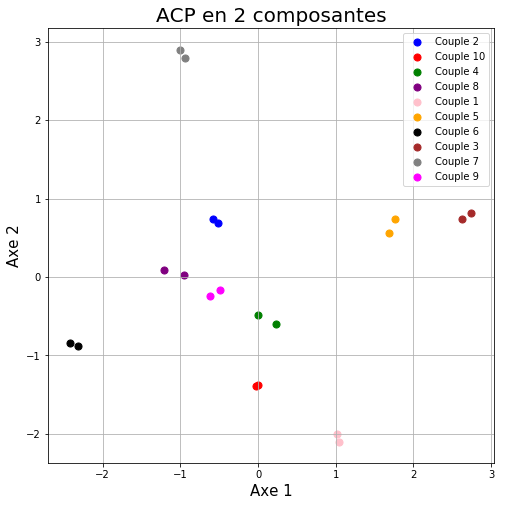

In [52]:
# Représentation simple statique 
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Axe 1', fontsize = 15)
ax.set_ylabel('Axe 2', fontsize = 15)
ax.set_title('ACP en 2 composantes', fontsize = 20)
targets = list(set(df_res['label']))
colors = ['blue', 'red', 'green', 'purple', 'pink', 'orange', 'black', 'brown', 'grey', 'magenta']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Axe 1']
               , finalDf.loc[indicesToKeep, 'Axe 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [53]:
# Représentation interactive 

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Travailler avec sous-table sinon trop lourd
subFinalDf = pd.concat([finalDf[(finalDf['label'] != "Autre")],finalDf.iloc[1:100:]],  axis = 0)


subFinalDf.iplot(kind='scatter',
              mode='markers',
              x='Axe 1',
              y='Axe 2',
              categories='label',
              text='mot',
              xTitle='Axe 1',
              yTitle='Axe 2',
              title='ACP en 2 composantes',
              filename='cufflinks/simple-scatter')